### Does specialization affect synchronization?

In [1]:
from synchGraph import *
from specializeGraph import *

In [2]:
def strConv(G,d,numOrb=100,maxTol=1):
    m,n = G.shape
    L = laplacian(G)
    conv = True
    GraphDyn = lambda x : x - d*np.dot(L,x)
    
    for i in range(numOrb):
        x0 = np.random.rand(n)*2-1
        var = np.var(iterate(x0,GraphDyn,iters=200)[:,-1])
        if np.isnan(var):
            var = np.inf
        if var > maxTol:
            conv = False
            break
            
    return conv

def weakConv(G,d,numOrb=100,maxTol=1):
    m,n = G.shape
    L = laplacian(G)
    conv = False
    GraphDyn = lambda x : x - d*np.dot(L,x)
    
    for i in range(numOrb):
        x0 = np.random.rand(n)*2-1
        var = np.var(iterate(x0,GraphDyn,iters=200)[:,-1])
        if var < maxTol:
            conv = True
            break
            
    return conv

In [3]:
def findDamp(G,I=[1e-5,10],tol=1e-6,strong=True):
    i = 0
    lenI = I[1]-I[0]
    if strong:
        conv = strConv
    else:
        conv = weakConv
    
    while lenI > tol:
        mid = I[0] + (I[1]-I[0])*.5
        if conv(G,mid):
            I[0] = mid
        else:
            I[1] = mid
        lenI = I[1]-I[0]
        
        i+=1
        if i > 2000:
            break
    return I[0]

### Find Dampening values for fan graphs

In [4]:
A = np.array([[0,1,1],
              [1,0,0],
              [0,1,0]
             ])
print("Spectral R: "+str(spectralRad(laplacian(A))))
print("Feedler: "+str(fiedler(laplacian(A))))

print("Weak d: "+str(findDamp(A,I=[.5,2],strong=False)))
print("Strong d: "+str(findDamp(A,I=[.5,2],strong=True)))

Spectral R: 2.0000000144333283
Feedler: -1.999999985566672
Weak d: 1.00540542603
Strong d: 0.953576564789


In [5]:
A = np.array([[0,1,1,0],
               [1,0,0,1],
               [0,1,0,0],
               [1,0,0,0.]
              ])
print("Spectral R: "+str(spectralRad(laplacian(A))))
print("Feedler: "+str(fiedler(laplacian(A))))

print("Weak d: "+str(findDamp(A,I=[.5,2],strong=False)))
print("Strong d: "+str(findDamp(A,I=[.5,2],strong=True)))

Spectral R: (1.9999999999999998+0j)
Feedler: (-1.9999999999999991+3.3152145044908365e-08j)
Weak d: 1.00181484222
Strong d: 0.939453125


In [6]:
A = np.array([[0,1,1,0,0],
               [1,0,0,1,0],
               [0,1,0,0,0],
               [1,0,0,0,1],
               [1,0,0,0,0]
              ])

print("Spectral R: "+str(spectralRad(laplacian(A))))
print("Feedler: "+str(fiedler(laplacian(A))))

print("Weak d: "+str(findDamp(A,I=[.5,2],strong=False)))
print("Strong d: "+str(findDamp(A,I=[.5,2],strong=True)))

Spectral R: 2.00000001601234
Feedler: -1.9999999839876603
Weak d: 0.9921875
Strong d: 0.891749858856


In [7]:
A = np.array([[0,1,1,0,0,0],
               [1,0,0,1,0,0],
               [0,1,0,0,0,0],
               [1,0,0,0,0,0],
               [1,0,0,0,1,0],
               [1,0,0,0,0,1.]
              ])
print("Spectral R: "+str(spectralRad(laplacian(A))))
print("Feedler: "+str(fiedler(laplacian(A))))

print("Weak d: "+str(findDamp(A,I=[.5,2],strong=False)))
print("Strong d: "+str(findDamp(A,I=[.5,2],strong=True)))

Spectral R: 2.000000012530333
Feedler: -1.0
Weak d: 1.00518941879
Strong d: 0.933488607407


### Compare Dampening values to spectral radius for random graphs

In [8]:
import networkx as nx

In [9]:
howMany = 25
n = 6
for i in range(howMany):
    G = randomGraph(n,base=False)
    if nx.is_strongly_connected(nx.DiGraph(G)):
        print("Spectral R: "+str(spectralRad(laplacian(G))))
        print("Feedler: "+str(fiedler(laplacian(G))))

        print("Weak d: "+str(findDamp(G,I=[.00001,20],strong=False)))
        print("Strong d: "+str(findDamp(G,I=[.00001,20],strong=True)))
        print("\n")

Spectral R: 6.000000000000005
Feedler: -2.9999999999999973
Weak d: 0.340597326464
Strong d: 0.33463328869


Spectral R: (3.618033988749894+0j)
Feedler: (-1.3819660112501055+0j)
Weak d: 0.545048308375
Strong d: 0.539718463704


Spectral R: 5.618033988749897
Feedler: -3.3819660112501047
Weak d: 0.362529440589
Strong d: 0.356906341213


Spectral R: 6.000000000000003
Feedler: -3.381966011250105
Weak d: 0.338684614369
Strong d: 0.333675442527


Spectral R: (5+0j)
Feedler: (-1.711205007811516+0j)
Weak d: 0.461235279031
Strong d: 0.442105773901


Spectral R: 6.0
Feedler: -5.999999999999997
Weak d: 0.33930688655
Strong d: 0.333067475454


Spectral R: (5.022981128524874+0j)
Feedler: (-2.1821691481904377+0.5050106117644292j)
Weak d: 0.405129454957
Strong d: 0.399487282103


Spectral R: (4.3247179572447525+0j)
Feedler: (-1.999999999999998+0j)
Weak d: 0.472077954541
Strong d: 0.465180508496


Spectral R: (3.272019649514066+0j)
Feedler: (-0.7279803504859322+0j)
Weak d: 0.624778421594
Strong d: 0.61

In [20]:
np.log(np.linalg.norm(np.eye(6)-.5*laplacian(G),ord=2))

0.27511227908935765

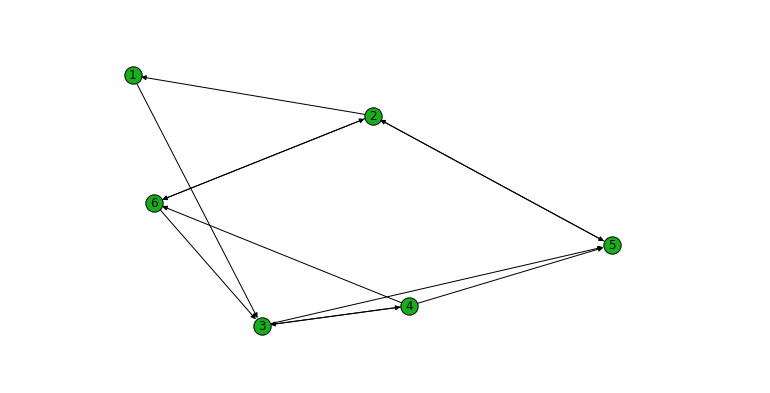

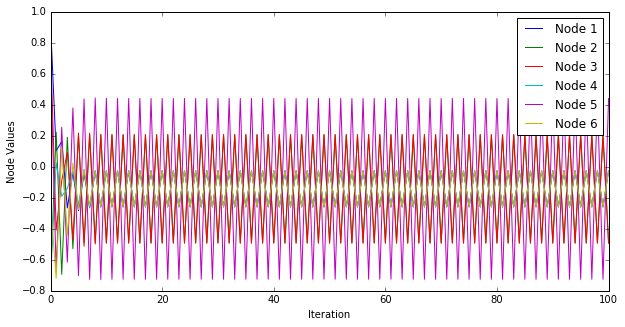

Node variance in last iteration: 0.102797398352

Last four iterations:
[[-0.25895754  0.20761357  0.20761357 -0.25895754 -0.72552866 -0.25895754]
 [-0.02567199 -0.4922431  -0.4922431  -0.02567199  0.44089913 -0.02567199]
 [-0.25895754  0.20761357  0.20761357 -0.25895754 -0.72552866 -0.25895754]
 [-0.02567199 -0.4922431  -0.4922431  -0.02567199  0.44089913 -0.02567199]]


array([ 0.91817276, -0.71226684,  0.77806631, -0.72461086,  0.68034767,
       -0.2327109 ])

In [25]:
netwDyn(G,d=.5)